Question 1
1. Load MNIST dataset
2. Take one random image from each class and estimate L1 distance to every other class. Display these
results as cell output
3. Load CIFAR10 dataset
4. Take one random image from each class and estimate L1 distance to every other class. Display these
results as cell output
5. Find the closest neighboring class (K=1) based on L1 distance for each image class and provide your
thoughts on why these images from different class looks similar.
6. Repeat Steps 1-5 but replace L1 distance with L2 distance

In [ ]:
import tensorflow as tf
import numpy as np

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (_, _) = mnist.load_data()

# Select one random image from each class
num_classes = 10
random_images = [np.random.choice(np.where(train_labels == i)[0]) for i in range(num_classes)]

# Method to find the L1 distance

def find_L1_distance(num_classes,train_images,random_images):
  # Calculate L1 distances
  distances = np.zeros((num_classes, num_classes))
  for i in range(num_classes):
    for j in range(num_classes):
      distances[i, j] = np.sum(np.abs(train_images[random_images[i]] - train_images[random_images[j]]))
  return distances

# Method to find the L2 distance
def find_L2_distance(num_classes, train_images, random_images):
    distances = np.zeros((num_classes, num_classes))
    for i in range(num_classes):
        for j in range(num_classes):
            distances[i, j] = np.linalg.norm(train_images[random_images[i]] - train_images[random_images[j]])
    return distances


L1_distances_mnist=find_L1_distance(num_classes,train_images,random_images)

# Display the L1 distance results for MNIST dataset
print("L1 Distances for MNIST dataset:")
print(L1_distances_mnist)



11490434/11490434 [==============================] - 0s 0us/step
L1 Distances for MNIST dataset:
[[    0. 36994. 36880. 37785. 37832. 32087. 35796. 35765. 35915. 37156.]
 [21630.     0. 20622. 17943. 21574. 17877. 20306. 22067. 23753. 19874.]
 [33776. 27762.     0. 28553. 34232. 31047. 32196. 34981. 36667. 31764.]
 [34663. 28137. 28279.     0. 34863. 31166. 34107. 35356. 33714. 33163.]
 [33592. 31418. 29256. 29649.     0. 28559. 28428. 30701. 32899. 22620.]
 [28841. 25131. 26553. 25666. 28529.     0. 27261. 25438. 29428. 27341.]
 [29484. 29358. 28988. 31685. 29684. 28291.     0. 28897. 32631. 28496.]
 [29771. 32205. 32859. 31204. 33299. 29090. 33567.     0. 34966. 29807.]
 [32181. 29239. 29637. 31566. 31357. 29196. 29833. 32874.     0. 31705.]
 [26844. 24158. 22252. 25973. 25508. 23347. 25520. 26769. 29223.     0.]]


In [ ]:
# Load CIFAR-10 dataset
cifar = tf.keras.datasets.cifar10
(train_images_cifar, train_labels_cifar), (_, _) = cifar.load_data()

# Select one random image from each class
num_classes_cifar = 10
random_images_cifar = [np.random.choice(np.where(train_labels_cifar[:, 0] == i)[0]) for i in range(num_classes_cifar)]

# Calculate L1 distances
L1_distances_cifar=find_L1_distance(num_classes_cifar,train_images,random_images_cifar)

# Display the L1 distance results for CIFAR 10 dataset
print("\nL1 Distances for CIFAR-10 dataset:")
print(L1_distances_cifar)


170498071/170498071 [==============================] - 2s 0us/step

L1 Distances for CIFAR-10 dataset:
[[    0. 29841. 35759. 23556. 31989. 37386. 31858. 37129. 34683. 31210.]
 [33647.     0. 35102. 34931. 28004. 33657. 37601. 33912. 34794. 23129.]
 [39761. 28642.     0. 40021. 22854. 24923. 32963. 30810. 35276. 28987.]
 [30716. 29069. 27563.     0. 26609. 28166. 28270. 30469. 29303. 27622.]
 [37387. 29596. 29882. 36879.     0. 30485. 36221. 31508. 31878. 26357.]
 [31990. 22151. 21925. 31738. 19947.     0. 25192. 18175. 25201. 23776.]
 [30606. 33823. 31805. 35218. 34691. 33432.     0. 39831. 39689. 31608.]
 [33015. 23688. 25766. 31227. 19180. 22785. 30313.     0. 28018. 27873.]
 [31109. 25110. 27700. 30857. 24698. 24463. 33783. 27790.     0. 24431.]
 [43286. 38567. 40901. 40218. 32779. 37920. 41352. 37407. 40593.     0.]]


In [ ]:
# Find the closest neighboring class for each image
m_closest_neighbors = []
for i in range(10):
    distance = L1_distances_mnist[i]
    closest_neighbor = np.argmin(distance)
    m_closest_neighbors.append(closest_neighbor)

# Print the closest neighboring class for each image class
print("Closest Neighboring Class (K=1) for Each Image Class in MNIST Dataset:")
for i in range(10):
    print(f"Image Class {i}: {m_closest_neighbors[i]}")

# Find the closest neighboring class for each image
closest_neighbors = []
for i in range(10):
    distances = L1_distances_cifar[i]
    closest_neighbor = np.argmin(distances)
    closest_neighbors.append(closest_neighbor)

# Print the closest neighboring class for each image class
print("Closest Neighboring Class (K=1) for Each Image Class in CIFAR 10 Dataset:")
for i in range(10):
    print(f"Image Class {i}: {closest_neighbors[i]}")


Closest Neighboring Class (K=1) for Each Image Class in MNIST Dataset:
Image Class 0: 0
Image Class 1: 1
Image Class 2: 2
Image Class 3: 3
Image Class 4: 4
Image Class 5: 5
Image Class 6: 6
Image Class 7: 7
Image Class 8: 8
Image Class 9: 9
Closest Neighboring Class (K=1) for Each Image Class in CIFAR 10 Dataset:
Image Class 0: 0
Image Class 1: 1
Image Class 2: 2
Image Class 3: 3
Image Class 4: 4
Image Class 5: 5
Image Class 6: 6
Image Class 7: 7
Image Class 8: 8
Image Class 9: 9


In [ ]:
# Calculate L2 distances for MNIST
L2_distances_mnist=find_L2_distance(num_classes,train_images,random_images)

# Display the L1 distance results for MNIST dataset
print("L2 Distances for MNIST dataset:")
print(L2_distances_mnist)

L2 Distances for MNIST dataset:
[[   0.         2800.53387767 2744.84717243 2779.56849169 2805.64181606
  2523.26792077 2675.48089135 2706.26070437 2666.70827051 2752.93988311]
 [1977.32293771    0.         1956.05010161 1781.24815789 2033.98279245
  1769.509254   1888.74826274 2050.77619452 2074.18297168 1905.43013517]
 [2596.06664013 2377.80823449    0.         2360.08453238 2643.63310616
  2475.71545215 2514.25177737 2675.53639482 2704.90942547 2534.49639968]
 [2631.87556697 2404.68480263 2345.1769656     0.         2668.09801169
  2483.05779232 2597.99903772 2725.89985143 2553.00254602 2593.30850459]
 [2605.03090193 2580.14534474 2390.59406843 2404.98711015    0.
  2360.79202811 2330.52440451 2494.67613128 2538.94958595 2050.64672725]
 [2352.85039898 2233.42494837 2231.30074172 2181.1868329  2359.16489462
     0.         2242.97815415 2191.00570515 2361.5736279  2291.72838705]
 [2354.21451869 2425.83635062 2345.25350442 2475.79623556 2398.51620799
  2301.0065189     0.         2362

In [ ]:
# Calculate L2 distances for CIFAR10
L2_distances_cifar=find_L2_distance(num_classes_cifar,train_images,random_images_cifar)

# Display the L1 distance results for CIFAR 10 dataset
print("\nL2 Distances for CIFAR-10 dataset:")
print(L2_distances_cifar)


L2 Distances for CIFAR-10 dataset:
[[   0.         2408.18873845 2670.28144584 2056.69929742 2520.06091196
  2802.03104908 2512.2551622  2734.28839006 2642.60988419 2464.62532649]
 [2602.63501091    0.         2659.21266543 2620.05629711 2361.70319896
  2676.91370799 2776.13490306 2624.7327483  2649.87207238 2065.62605522]
 [2855.68117968 2327.58501456    0.         2879.55743127 2069.42117511
  2234.2204457  2586.97564735 2457.61632482 2694.49215994 2374.17080262]
 [2462.31029726 2316.03605326 2258.8941985     0.         2225.86140629
  2336.5491649  2324.6591148  2431.78638042 2320.55532147 2271.71124926]
 [2780.75439404 2446.4656139  2466.10462065 2753.82987855    0.
  2557.20804785 2757.29378195 2560.92014713 2543.67175555 2275.64034944]
 [2543.61986154 2054.34442098 2055.29876174 2524.65720445 1959.99617347
     0.         2222.11970875 1825.24217571 2220.04617069 2152.50412311]
 [2447.63436812 2596.10419668 2529.03044663 2680.06119333 2685.32847153
  2654.66683409    0.         

In [ ]:
# Find the closest neighboring class for each image
m_closest_neighbors = []
for i in range(10):
    distance2 = L2_distances_mnist[i]
    closest_neighbor = np.argmin(distance2)
    m_closest_neighbors.append(closest_neighbor)

# Print the closest neighboring class for each image class
print("Closest Neighboring Class (K=1) for Each Image Class in MNIST Dataset:")
for i in range(10):
    print(f"Image Class {i}: {m_closest_neighbors[i]}")

# Find the closest neighboring class for each image
closest_neighbors = []
for i in range(10):
    distance2 = L2_distances_cifar[i]
    closest_neighbor = np.argmin(distance2)
    closest_neighbors.append(closest_neighbor)

# Print the closest neighboring class for each image class
print("Closest Neighboring Class (K=1) for Each Image Class in CIFAR 10 Dataset:")
for i in range(10):
    print(f"Image Class {i}: {closest_neighbors[i]}")

Closest Neighboring Class (K=1) for Each Image Class in MNIST Dataset:
Image Class 0: 0
Image Class 1: 1
Image Class 2: 2
Image Class 3: 3
Image Class 4: 4
Image Class 5: 5
Image Class 6: 6
Image Class 7: 7
Image Class 8: 8
Image Class 9: 9
Closest Neighboring Class (K=1) for Each Image Class in CIFAR 10 Dataset:
Image Class 0: 0
Image Class 1: 1
Image Class 2: 2
Image Class 3: 3
Image Class 4: 4
Image Class 5: 5
Image Class 6: 6
Image Class 7: 7
Image Class 8: 8
Image Class 9: 9


Images from from different classes look similar based on the L1 and L2 distances and this could be due to factors like color distribution, shapes, or texture similarities. We can see that the distances from particular class image seems almost equal or nearers to the two or more different classes, this might be due to the distrubution of pixels of images or orientation of the images in the dataset.

If you use L2 distance (Euclidean distance) as a similarity metric, similar reasons to those mentioned for L1 distance still apply. However, there are some differences in how L2 distance calculates similarity:







Question 2
1. Divide the MNIST data in train (80%) and test (20%)
2. Based on L1 distance function, run K-nearest neighbor classifier for K=5 on test set.
3. Estimate the computing time to complete testing
4. Repeat steps 2 and 3 for K=25, 55, and 105
5. Repeat steps 2,3, and 4 with L2 as a distance function


In [ ]:
import numpy as np
import time

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = np.zeros(X_test.shape[0], dtype=int)

        for i, x_test in enumerate(X_test):
            # L1 or Manhattan Distance calculation
            distances = np.sum(np.abs(self.X_train - x_test), axis=1)
            k_neighbors_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_neighbors_indices]
            predictions[i] = np.argmax(np.bincount(k_nearest_labels))

        return predictions

    def predict_using_L2(self, X_test):
      predictions = np.zeros(X_test.shape[0], dtype=int)
      for i, x_test in enumerate(X_test):
        # L2 or Euclidean Distance calculation
        distances = np.linalg.norm(self.X_train - x_test, axis=1)
        k_neighbors_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_neighbors_indices]
        predictions[i] = np.argmax(np.bincount(k_nearest_labels))

      return predictions


# Load MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

# Extract features (images) and labels
X = np.array(mnist.data.astype('float32'))
y = np.array(mnist.target.astype('int'))

# Normalize pixel values to be between 0 and 1
X_normalized = X / 255.0

# Split the data into train (80%) and test (20%) sets
split_index = int(0.8 * len(X_normalized))
X_train, X_test = X_normalized[:split_index], X_normalized[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(X_train.shape,X_test.shape)




/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(56000, 784) (14000, 784)


In [ ]:
# Measure the time taken for testing
start_time = time.time()

# Create and train KNN model
knn_model = KNN(k=5)
knn_model.fit(X_train, y_train)

# Make predictions
predictions = knn_model.predict(X_test)

# Calculate the time taken
elapsed_time = time.time() - start_time

# Evaluate the model
accuracy = np.mean(predictions == y_test)
print(f"Accuracy on the test set: {accuracy:.2f}")
print(f"Time taken for testing: {elapsed_time:.2f} seconds")


Accuracy on the test set: 0.96
Time taken for testing: 1252.13 seconds


In [ ]:
# Measure the time taken for testing
start_time = time.time()

# Create and train KNN model
K=25
knn_model = KNN(k=K)
knn_model.fit(X_train, y_train)

# Make predictions
predictions = knn_model.predict(X_test)

# Calculate the time taken
elapsed_time = time.time() - start_time

# Evaluate the model
accuracy = np.mean(predictions == y_test)
print(f"Accuracy on the test set for k= {K} with L1 distance as metric is: {accuracy:.2f}")
print(f"Time taken for testing: {elapsed_time:.2f} seconds")

Accuracy on the test set for k= 25 with L1 distance as metric is: 0.96
Time taken for testing: 1932.48 seconds


In [ ]:
# Measure the time taken for testing
start_time = time.time()

# Create and train KNN model
K=55
knn_model = KNN(k=K)
knn_model.fit(X_train, y_train)

# Make predictions
predictions = knn_model.predict(X_test)

# Calculate the time taken
elapsed_time = time.time() - start_time

# Evaluate the model
accuracy = np.mean(predictions == y_test)
print(f"Accuracy on the test set for k= {K} with L1 distance as metric is: {accuracy:.2f}")
print(f"Time taken for testing: {elapsed_time:.2f} seconds")

Accuracy on the test set for k= 55 with L1 distance as metric is: 0.95
Time taken for testing: 1664.71 seconds


In [ ]:
# Measure the time taken for testing
start_time = time.time()

# Create and train KNN model
K=105
knn_model = KNN(k=K)
knn_model.fit(X_train, y_train)

# Make predictions
predictions = knn_model.predict(X_test)

# Calculate the time taken
elapsed_time = time.time() - start_time

# Evaluate the model
accuracy = np.mean(predictions == y_test)
print(f"Accuracy on the test set for k= {K} with L1 distance as metric is: {accuracy:.2f}")
print(f"Time taken for testing: {elapsed_time:.2f} seconds")

Accuracy on the test set for k= 105 with L1 distance as metric is: 0.94
Time taken for testing: 1661.54 seconds


In [ ]:
# Measure the time taken for testing
start_time = time.time()

# Create and train KNN model
K=5
knn_model = KNN(k=K)
knn_model.fit(X_train, y_train)

# Make predictions
predictions = knn_model.predict_using_L2(X_test)

# Calculate the time taken
elapsed_time = time.time() - start_time

# Evaluate the model
accuracy = np.mean(predictions == y_test)
print(f"Accuracy on the test set for k= {K} with L2 distance as metric is: {accuracy:.2f}")
print(f"Time taken for testing: {elapsed_time:.2f} seconds")

Accuracy on the test set for k= 5 with L2 distance as metric is: 0.97
Time taken for testing: 1314.08 seconds


In [ ]:
# Measure the time taken for testing
start_time = time.time()

# Create and train KNN model
K=25
knn_model = KNN(k=K)
knn_model.fit(X_train, y_train)

# Make predictions
predictions = knn_model.predict_using_L2(X_test)

# Calculate the time taken
elapsed_time = time.time() - start_time

# Evaluate the model
accuracy = np.mean(predictions == y_test)
print(f"Accuracy on the test set for k= {K} with L2 distance as metric is: {accuracy:.2f}")
print(f"Time taken for testing: {elapsed_time:.2f} seconds")

Accuracy on the test set for k= 25 with L2 distance as metric is: 0.96
Time taken for testing: 1661.36 seconds


In [ ]:
# Measure the time taken for testing
start_time = time.time()

# Create and train KNN model
K=55
knn_model = KNN(k=K)
knn_model.fit(X_train, y_train)

# Make predictions
predictions = knn_model.predict_using_L2(X_test)

# Calculate the time taken
elapsed_time = time.time() - start_time

# Evaluate the model
accuracy = np.mean(predictions == y_test)
print(f"Accuracy on the test set for k= {K} with L2 distance as metric is: {accuracy:.2f}")
print(f"Time taken for testing: {elapsed_time:.2f} seconds")

Accuracy on the test set for k= 55 with L2 distance as metric is: 0.96
Time taken for testing: 1666.33 seconds


In [ ]:
# Measure the time taken for testing
start_time = time.time()

# Create and train KNN model
K=105
knn_model = KNN(k=K)
knn_model.fit(X_train, y_train)

# Make predictions
predictions = knn_model.predict_using_L2(X_test)

# Calculate the time taken
elapsed_time = time.time() - start_time

# Evaluate the model
accuracy = np.mean(predictions == y_test)
print(f"Accuracy on the test set for k= {K} with L2 distance as metric is: {accuracy:.2f}")
print(f"Time taken for testing: {elapsed_time:.2f} seconds")

Accuracy on the test set for k= 105 with L2 distance as metric is: 0.95
Time taken for testing: 1653.49 seconds


Question 3
1. Implement the same code in the link provided in Resources section (R3) for MNIST dataset
2. Repeat step 1 by changing the number of neurons in the second layer to same size as your input
3. Repeat step 1 by changing the number of neurons in the second layer to 2 times the size of your input
4. Repeat step 1 by adding another dense layer with (your chosen number) neurons
5. Compare the accuracy for the 3 above classifiers from 1-4

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [ ]:
#Loading the MNIST Dataset

mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
class_names = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
#Printing the shape of train and test data

print("Shape of train images : ",train_images.shape)
print("Shape of test images: ",test_images.shape)
print("Shape of train_labels: ", train_labels.shape)
print("Shape of train_labels: ", test_labels.shape)

Shape of train images :  (60000, 28, 28)
Shape of test images:  (10000, 28, 28)
Shape of train_labels:  (60000,)
Shape of train_labels:  (10000,)


In [ ]:
# Normalization of training and test data
train_images = train_images / 255.0

test_images = test_images / 255.0

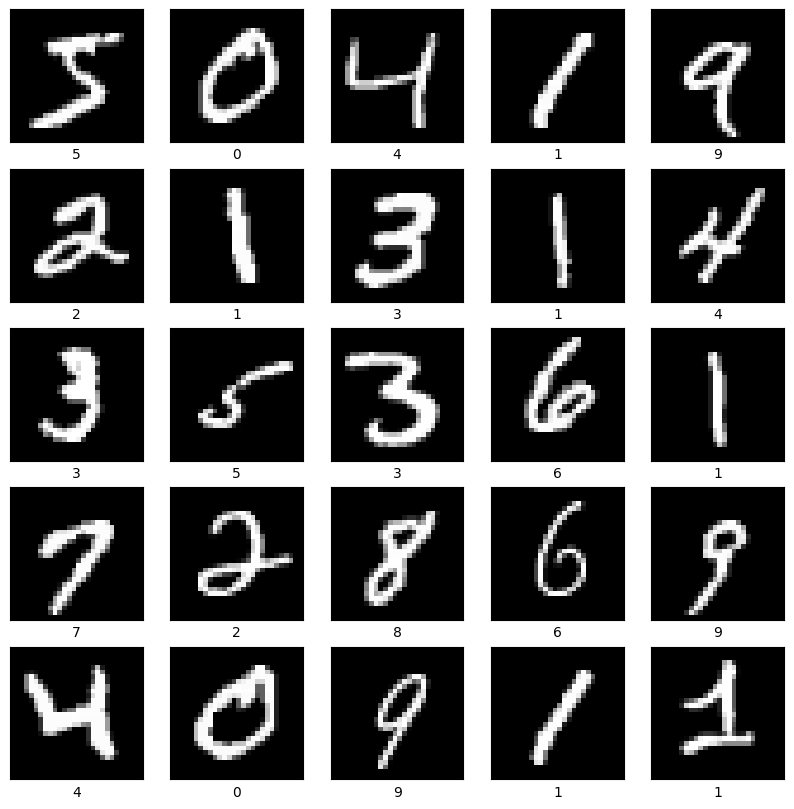

In [ ]:
#Displaying few sample images from MNIST dataset

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#Implementing the Model

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2586 - accuracy: 0.9273
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1148 - accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0786 - accuracy: 0.9765
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0584 - accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0445 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0364 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0289 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0227 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0193 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.015

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0810 - accuracy: 0.9776 - 745ms/epoch - 2ms/step

Test accuracy: 0.9775999784469604


In [ ]:
probability_model1 = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions1 = probability_model1.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

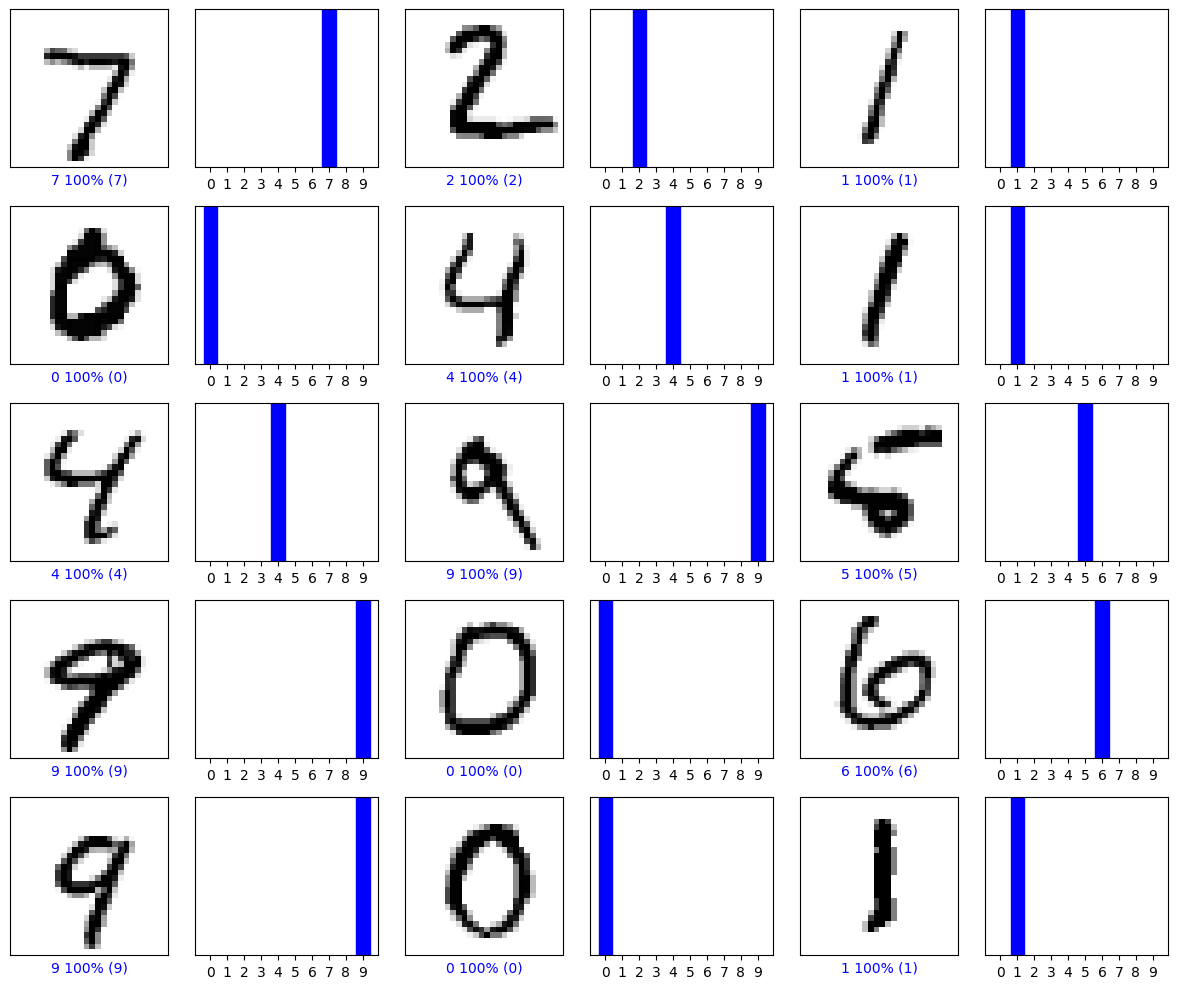

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions1[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions1[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(28*28, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1882 - accuracy: 0.9441
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0768 - accuracy: 0.9765
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0507 - accuracy: 0.9837
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0349 - accuracy: 0.9888
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0279 - accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0197 - accuracy: 0.9934
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0177 - accuracy: 0.9942
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0137 - accuracy: 0.9954
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0141 - accuracy: 0.9953
Epoch 10/10
1875/1875 [==============================] - 30s 16m

In [ ]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.0838 - accuracy: 0.9805 - 2s/epoch - 5ms/step

Test accuracy: 0.9804999828338623


In [ ]:
probability_model2 = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions2 = probability_model1.predict(test_images)

313/313 [==============================] - 1s 2ms/step


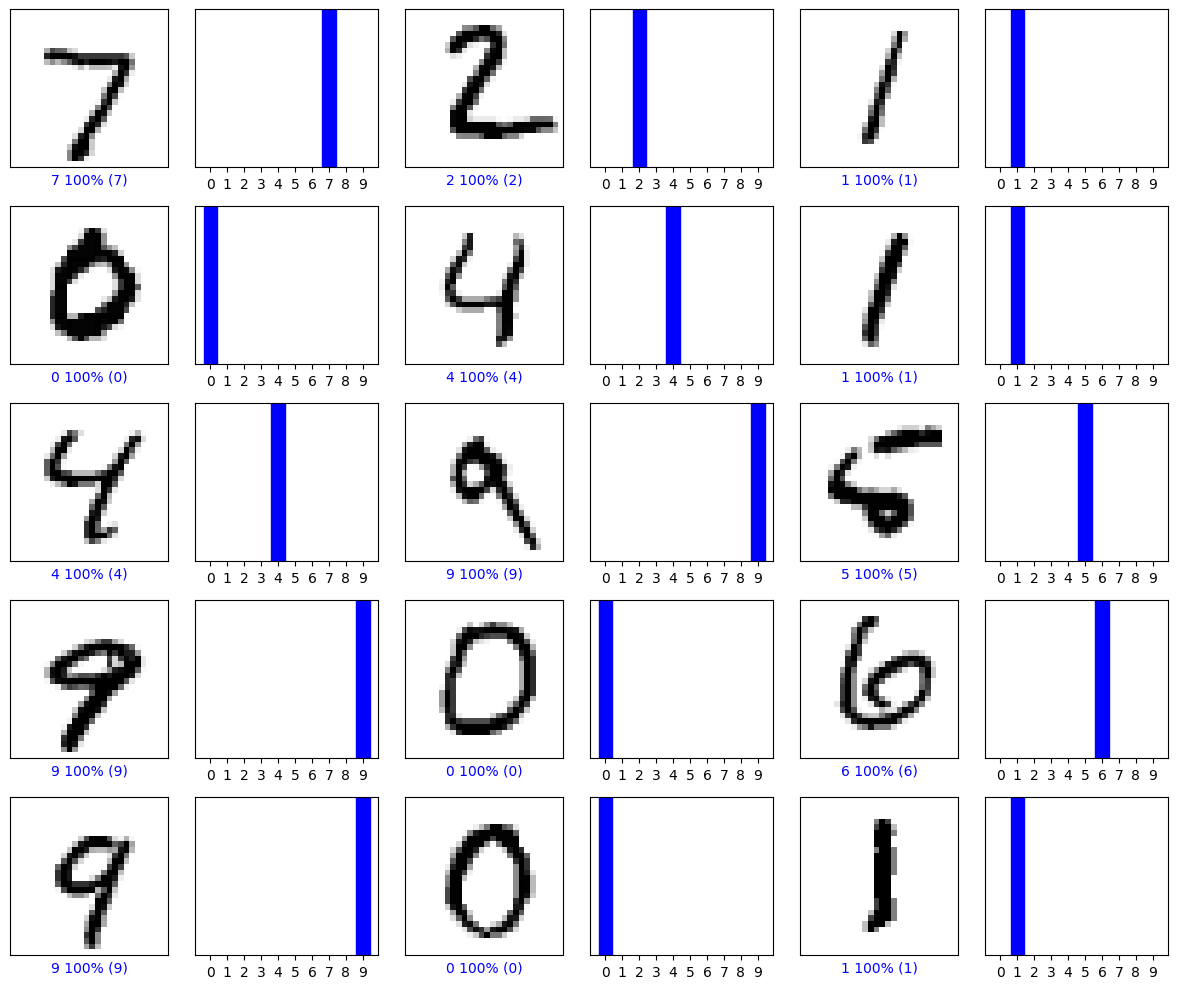

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions2[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions2[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(2*(28*28), activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model3.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1783 - accuracy: 0.9461
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0738 - accuracy: 0.9767
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0481 - accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0348 - accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0277 - accuracy: 0.9906
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0207 - accuracy: 0.9934
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0193 - accuracy: 0.9937
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0163 - accuracy: 0.9943
Epoch 9/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0139 - accuracy: 0.9953
Epoch 10/10
1875/1875 [==============================] - 34s 18m

In [ ]:
test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.1244 - accuracy: 0.9762 - 1s/epoch - 5ms/step

Test accuracy: 0.9761999845504761


In [ ]:
probability_model3 = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions3 = probability_model1.predict(test_images)

313/313 [==============================] - 1s 3ms/step


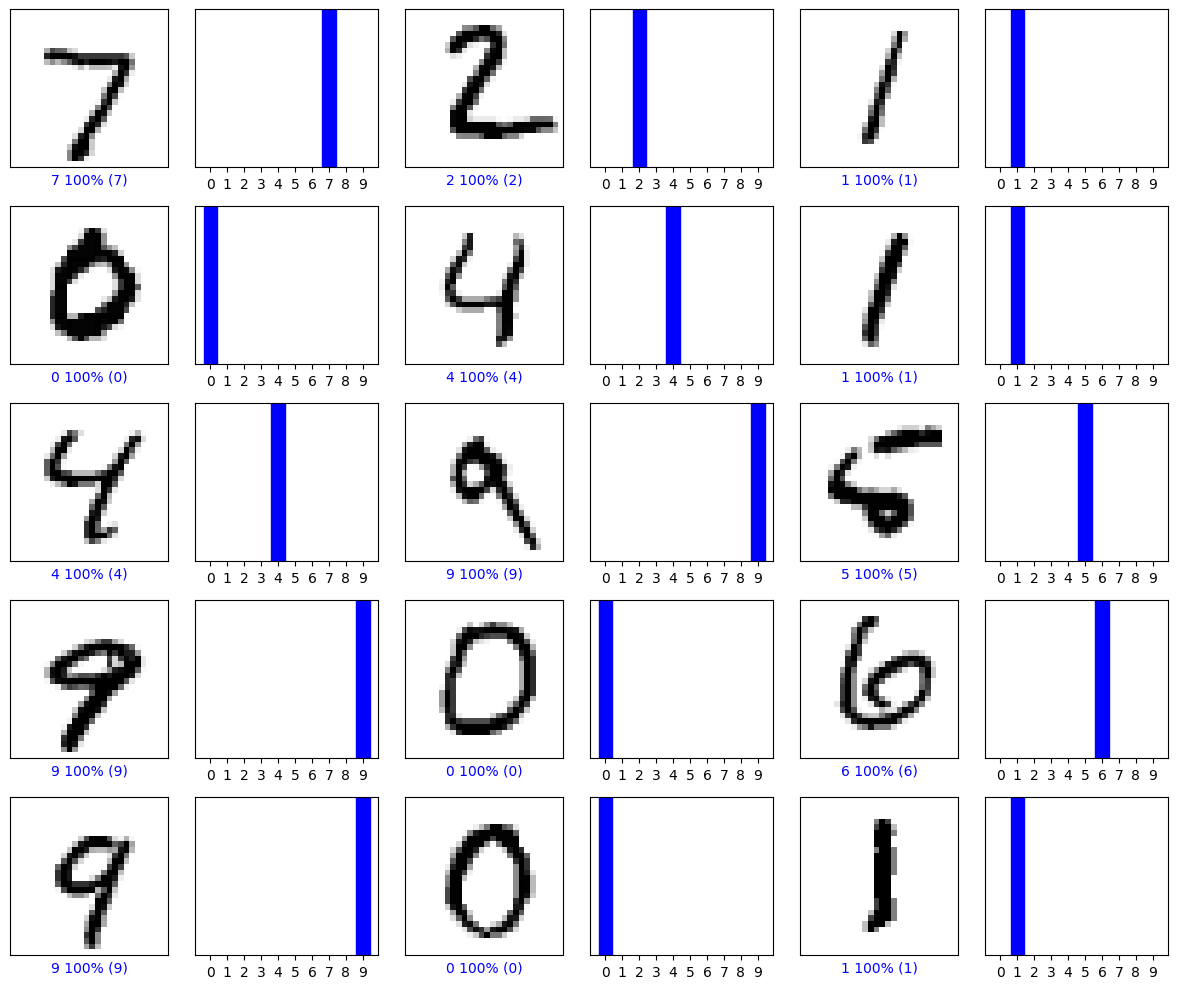

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions3[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions3[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    #Adding one more dense layer with 64 neurons
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model4.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4972 - accuracy: 0.8227
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3675 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3307 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3082 - accuracy: 0.8868
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2904 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2775 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2632 - accuracy: 0.9021
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2548 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2449 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.23

In [ ]:
test_loss, test_acc = model4.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3451 - accuracy: 0.8821 - 1s/epoch - 4ms/step

Test accuracy: 0.882099986076355


In [ ]:
probability_model = tf.keras.Sequential([model4,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


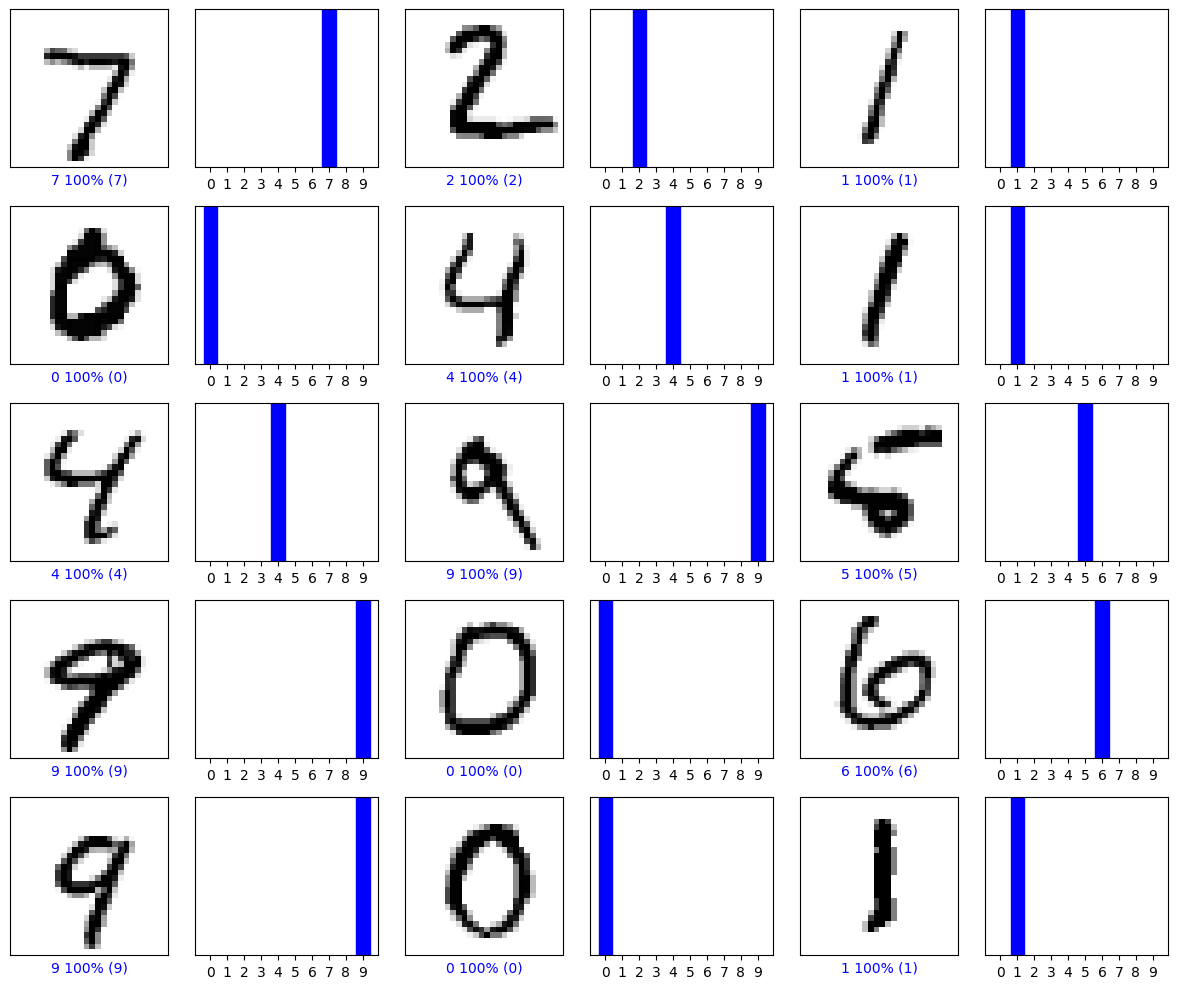

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

For all the above classifiers or models we have observed that the acccuracy is high for the model2 which is around 98.4 percent, the hyperparamters that we have choosen here is the number of neurons in second dense layers same as the input size, anyhow for all the model that we have defined we just observed very slight change in the accuray.We can further tune the hyperparameters to increase or adjust the accuracy.We need to check the validation of model on the test data when it is training so that we can observe that the model is not getting overfitted.

Question 4
1. Summarize the key observations in Q1, Q2, and Q3.

In the Q1 we have measured the L1 and L2 distances of an random image of a particular class to the other classes and then made K=1 and found the nearest neighbours to the particular classes. We have observed that the nearest neighbour for a class is the same. We have also observed that the distances L1 and L2 are for different classes images are similar i.e due to the pixel level simailarities , data charactertics, orientation of images in the dataset of different images of same class , limited semantic understanding or limited features extraction and also due to nosie in the data.


In the Q2 we have taken the MNIST dataset and divided the data into training and testing data of ratio (80:20). We have implemented the class KNN to apply the KNN algorithm on the data and predict the test data.Here we have implemented functions to find the L1 and L2 distances and predict the test images and calculated the accuracy for the different values of K(5,25,55,105) based on the metrics both L1 and L2. The computation has took a lot of time for the different values of .It is very difficult to handle such computations when we do have limited architecture and consumes a lot of time.When we have choosen the L1 distance as the metric we observed the accuracy is high for K= 5 and K= 25 which is around 96 percent whereas as we increase the value of K to 55 and 105 the computation decreased a bit but the acurracy is dropped by 1 percent and this might be due to the outliers in the data and also due to increased k size the clusters formed with this size are not much accurate for the MNIST dataset.
When we have choosen the L2 distance and K value as 5 we got the highest accuracy i.e 97 percent, so for the choosen dataset the highest accuracy obtained for the hyperparameters k=5 and distance L2 as metric.


In the Q3 we have trained the model with the Dense network model. Here we have defined 4 different models with modification in model architecture, model2 has given highest accuracy of 98.4 percent on the MNIST dataset.We have also visualized the predictions obtained by the model and displayed the images with probability of it using the matplotlib library. We can see most of the images are recoginzed with 100 percent accuracy. But still the accuracy hasn't reached 99-100. This is due to the some of the images in the dataset might be in different orientation which causes the model to predict it as the wrong.To overcome this we might need to introduce the CNN model with data augumnetation method which will expose the images with different orientation during the training itself, so that it can increase the model accuracy.

**Conclusion:**

K-Nearest Neighbors (KNN)

Pros:
KNN is simple, requiring no training phase, making it easy to understand and implement; its non-parametric nature adapts well to small or dynamically changing datasets.

Cons:
K-Nearest Neighbors (KNN) exhibits computational expense in predictions, particularly for large datasets, due to distance calculations; it demands storing the entire dataset in memory, which becomes impractical for very large datasets, and is sensitive to noise and irrelevant features.We have observed this during the execution of Q2 and Q4 which took hours of time for execution and requires huge memory.

Dense Neural network:

The Dense model is suitable for this choosen dataset and performs well on this dataset (mnist) compared to the KNN algorithm


Bonus Question
1. Apply KNN to fashion MNIST data (provided in the link R1.3)
2. Compare accuracies of MLP on fashion MNIST and KNN from Bonus Q1.

In [ ]:
import numpy as np
class KNN:

    def __init__(self, num_neighbors: int):
        self.num_neighbors = num_neighbors


    def fit(self, X: np.array, y: np.array):
        """
        Memorize training data
        """
        self.X = X
        self.y = y


    def get_distance(self, a: np.array,  b: np.array):
        """
        Calculate Euclidean distance between two examples
        """
        return np.sum((a - b) ** 2) ** 0.5


    def get_neighbors(self, example: np.array):
        """
        Find and rank nearest neighbors of example
        """

        # placeholder
        distances = []

        # calculate distances as tuples (id, distance)
        for i in range(len(self.X)):
            distances.append((i, self.get_distance(self.X[i], example)))

        # sort by distance
        distances.sort(key = lambda x: x[1])

        # return IDs and distances top neighbors
        return distances[:self.num_neighbors]


    def predict(self, X: np.array):
        """
        Predict labels
        """

        # placeholder
        predictions = []

        # go through examples
        for idx in range(len(X)):
            example     = X[idx]
            k_neighbors = self.get_neighbors(example)
            k_y_values  = [self.y[item[0]] for item in k_neighbors]
            prediction  = sum(k_y_values) / self.num_neighbors
            predictions.append(prediction)

        # return predictions
        return np.array(predictions)

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

# Load Fashion MNIST data
fashion_mnist = fetch_openml(name="Fashion-MNIST", version=1,cache=True)

# Split data into features and labels
X = np.array(fashion_mnist.data.astype('float32'))
y = np.array(fashion_mnist.target.astype('int'))

# Normalize pixel values to be between 0 and 1
X_normalized = X / 255.0

# Split the data into train (80%) and test (20%) sets
split_index = int(0.8 * len(X_normalized))
X_train, X_test = X_normalized[:split_index], X_normalized[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(X_train.shape,X_test.shape)




/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(56000, 784) (14000, 784)


In [ ]:
import time
# Measure the time taken for testing
start_time = time.time()

# fit KNN

knn = KNN(num_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)


# Calculate the time taken
elapsed_time = time.time() - start_time


# Evaluate the model
accuracy = np.mean(predictions == y_test)
print(f"Accuracy on the test set for k=5 :{accuracy:.2f}")
print(f"Time taken for testing: {elapsed_time:.2f} seconds")

#This cell took almost 4.5-5.5 hours and failed due to the computation limitaion and space requirements
# Unable to re run the cell and do further analysis due to the time constraint




In [16]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


# Flatten the images
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Normalize the pixel values to a range of [0, 1]
train_images_normalized = train_images_flat / 255.0
test_images_normalized = test_images_flat / 255.0

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display classification report
class_report = classification_report(y_test, predictions, target_names=class_names)
print('Classification Report:')
print(class_report)

Accuracy: 85.34%
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.77      0.86      0.81      1402
     Trouser       0.99      0.96      0.98      1394
    Pullover       0.72      0.82      0.77      1385
       Dress       0.91      0.87      0.89      1406
        Coat       0.78      0.76      0.77      1420
      Sandal       0.99      0.82      0.90      1419
       Shirt       0.65      0.57      0.61      1388
     Sneaker       0.87      0.96      0.91      1363
         Bag       0.98      0.95      0.96      1417
  Ankle boot       0.89      0.97      0.93      1406

    accuracy                           0.85     14000
   macro avg       0.86      0.85      0.85     14000
weighted avg       0.86      0.85      0.85     14000



MultiLayer Perceptron model on the Fashion MNIST dataset

In [ ]:


# Import the Keras library
from tensorflow import keras
(train_images, train_labels), (test_images, test_labels) =  \
       keras.datasets.fashion_mnist.load_data()


# Finding the size of the dataset
print('Training data:', train_images.shape, train_labels.shape)
print('Test data:', test_images.shape, test_labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


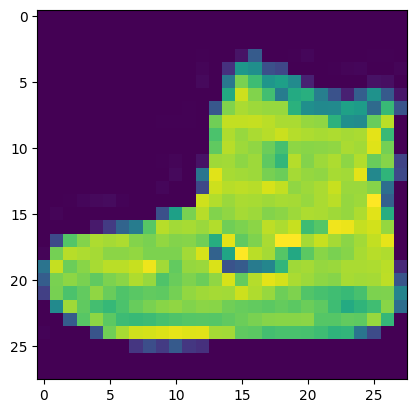

9 Ankle boot


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display image ‘0’
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
plt.show()
print(train_labels[0], class_names[train_labels[0]])

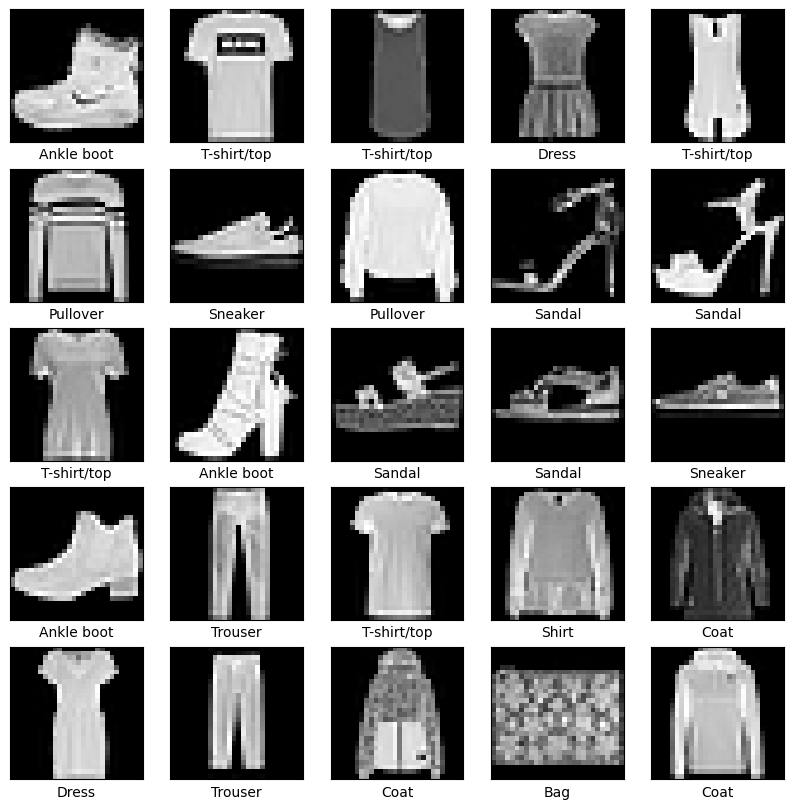

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]); plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#Normalization of data
print(train_images.min(), train_images.max())

train_images = train_images / 255.0
test_images = test_images / 255.0
print(train_images.min(), train_images.max())

0 255
0.0 1.0


In [ ]:
# Import libraries
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Version of Tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
# Dense model
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

model = keras.Sequential([
    # Input Layer: Flatten the 2D array to 1D
    keras.layers.Flatten(input_shape=(28, 28)),
    # Hidden Layer: Dense layer with 128 neurons
    keras.layers.Dense(128, activation='relu'),
    # Output Layer: 10 neurons, each representing a class
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
#Complie the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Fit the mode
model.fit(train_images,train_labels,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4974 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3748 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3364 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3121 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2931 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2809 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2676 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2563 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2444 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2

In [ ]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.3406 - accuracy: 0.8791 - 3s/epoch - 8ms/step

Test accuracy: 0.8791000247001648


In [ ]:
import numpy as np
#To make predictions

predictions = model.predict(test_images)

#Display the Confusion Matrix:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(test_labels, np.argmax(predictions, axis=1)))


313/313 [==============================] - 1s 2ms/step
[[747   0  21  28   8   0 187   0   9   0]
 [  1 966   2  21   4   0   6   0   0   0]
 [  5   0 711  11 178   0  94   0   1   0]
 [  8   5   9 890  46   0  36   0   6   0]
 [  0   0  42  21 861   0  75   0   1   0]
 [  0   0   0   1   0 960   0  18   0  21]
 [ 61   0  62  28  77   0 763   0   9   0]
 [  0   0   0   0   0  10   0 955   1  34]
 [  3   0   2   4   8   2   8   4 969   0]
 [  0   0   0   0   0   7   1  23   0 969]]


In [ ]:
print(classification_report(test_labels, np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.71      0.77      1000
           3       0.89      0.89      0.89      1000
           4       0.73      0.86      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.65      0.76      0.70      1000
           7       0.95      0.95      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



Fashion MNIST dataset

KNN algorithm on the Fashion MNIST dataset gives the less accuracy i.e of 85 percent as compared to the MLP model(Dense model) and also takes a lot of time for the computation of the distances and also for the predictions, whereas in the MLP model we have achived the accuracy of 89 percent on the dataset. The classification report and confusion matrix gives the clear report on the performance of dense model on the Fashion MNIST dataset. Hence,for such huge dataset it is preferred to use Dense or CNN model for the image classification tasks to achive the highest accuracy.